In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
filename = 'HR_dirty_data.txt'
data_location = 'dane/'
HR_dirty_data = pd.read_csv(data_location + filename, sep=';')

In [3]:
HR_dirty_data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53             2.0   
1                    0.80             0.86             5.0   
2                    0.11             0.88             7.0   
3                    0.72             0.87             5.0   
4                    0.37             0.52             2.0   
5                    0.41             0.50             2.0   
6                    0.10             0.77             6.0   
7                    0.92             0.85             5.0   
8                    0.89             1.00             5.0   
9                    0.42             0.53             2.0   
10                   0.45             1.40             2.0   
11                   0.11             0.81             6.0   
12                   0.84             0.92             4.0   
13                   0.41             0.55             2.0   
14                   0.36             0.56             2.0   
15                   0.38             0.54             2.0   
16                   0.45             0.47             2.0   
17                   0.78              NaN             4.0   
18                   0.45             0.51             2.0   
19                   0.76             0.89             5.0   
20                   0.11             0.83             6.0   
21                   0.38             0.55             2.0   
22                   0.09             0.95             6.0   
23                   0.46             0.57             NaN   
24                   0.40             0.53             2.0   
25                   0.89             1.70             5.0   
26                   0.82             0.87             4.0   
27                   0.40             0.49             2.0   
28                   0.41             0.46             2.0   
29                   0.38             0.50             2.0   
...                   ...              ...             ...   
14969                0.43             0.46             2.0   
14970                0.78             0.93             4.0   
14971                0.39             0.45             2.0   
14972                0.11             0.97             6.0   
14973                0.36             0.52             2.0   
14974                0.36             0.54             2.0   
14975                0.10             0.79             7.0   
14976                0.40             0.47             2.0   
14977                0.81             0.85             4.0   
14978                0.40             0.47             2.0   
14979                0.09             0.93             6.0   
14980                0.76             0.89             5.0   
14981                0.73             0.93             5.0   
14982                0.38             0.49             2.0   
14983                0.72             0.84             5.0   
14984                0.40             0.56             2.0   
14985                0.91             0.99             5.0   
14986                0.85             0.85             4.0   
14987                0.90             0.70             5.0   
14988                0.46             0.55             2.0   
14989                0.43             0.57             2.0   
14990                0.89             0.88             5.0   
14991                0.09             0.81             6.0   
14992                0.40             0.48             2.0   
14993                0.76             0.83             6.0   
14994                0.40             0.57             2.0   
14995                0.37             0.48             2.0   
14996                0.37             0.53             2.0   
14997                0.11             0.96             6.0   
14998                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                     157.0                 3.0            0.0   1.0   
1                 

In [6]:
## Oczysc zmienne numeryczne ##
#HR_dirty_data.describe()  # wyswietl podstawowe statystyki dla zmiennych numerycznych
# czyszczenie danych
# last evaluation powinno być w zakresie 0-1, describe() pokazało,
# że maksymalna wartosc wynosi 1.7
# sprawdz ile wartosci jest powyzej 1
sum(HR_dirty_data['last_evaluation'] > 1)  # 2

285

In [7]:
# Usunmy te wartosci (nie cale rekordy, tylko wartosci dla tej jednej kolumny)
mask = HR_dirty_data['last_evaluation'] > 1
HR_dirty_data.loc[mask, 'last_evaluation'] = np.nan

sum(HR_dirty_data['last_evaluation'] > 1)  # 0

0

In [8]:
HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000     14995.00000   
mean             0.612826         0.716053         3.87129   
std              0.248637         0.171150         8.26312   
min              0.090000         0.360000         2.00000   
25%              0.440000         0.560000         3.00000   
50%              0.640000         0.720000         4.00000   
75%              0.820000         0.870000         5.00000   
max              1.000000         1.000000      1004.00000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14997.000000  14997.000000   
mean             201.046146            3.498133       0.144696      0.237981   
std               49.941556            1.460305       0.352184      0.426175   
min               96.000000            2.000000      -1.000000     -1.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       2.000000      1.000000   

       promotion_last_5years  
count           14997.000000  
mean                0.021138  
std                 0.144772  
min                -1.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [9]:
# Sprawdzmy ile jest wartosci powyzej 100
sum(HR_dirty_data['number_project'] > 100)  # 1



1

In [10]:
# Usunmy tę jedna wartosc, analogicznie jak w przypadku last_evaluation
mask = HR_dirty_data['number_project'] > 100
HR_dirty_data.loc[mask, 'number_project'] = np.nan



In [11]:
sum(HR_dirty_data['number_project'] > 100)  # 0
HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000    14994.000000   
mean             0.612826         0.716053        3.804589   
std              0.248637         0.171150        1.250717   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000       30.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14997.000000  14997.000000   
mean             201.046146            3.498133       0.144696      0.237981   
std               49.941556            1.460305       0.352184      0.426175   
min               96.000000            2.000000      -1.000000     -1.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       2.000000      1.000000   

       promotion_last_5years  
count           14997.000000  
mean                0.021138  
std                 0.144772  
min                -1.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

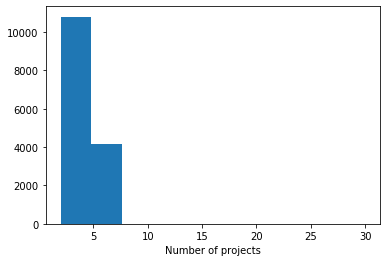

In [15]:
# Teraz maksymalna wartosc to 30, sprawdzmy histogram...
plt.hist(HR_dirty_data['number_project'].dropna())
plt.xlabel('Number of projects')
plt.show()

In [16]:
HR_dirty_data.number_project.value_counts()

4.0     4365
3.0     4055
5.0     2759
2.0     2386
6.0     1172
7.0      256
30.0       1
Name: number_project, dtype: int64

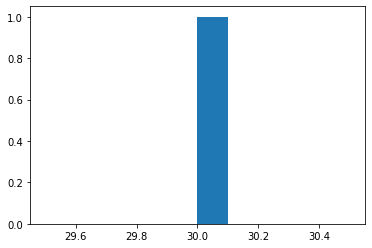

In [17]:
# Usunmy na chwile wartosc <= 8
HR_dirty_data_tmp = HR_dirty_data.loc[HR_dirty_data['number_project'] > 8, :]
plt.hist(HR_dirty_data_tmp['number_project'].dropna())
plt.show()

In [18]:
mask = HR_dirty_data['number_project'] == 30
HR_dirty_data.loc[mask, 'number_project'] = np.nan

HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000    14993.000000   
mean             0.612826         0.716053        3.802841   
std              0.248637         0.171150        1.232324   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14997.000000  14997.000000   
mean             201.046146            3.498133       0.144696      0.237981   
std               49.941556            1.460305       0.352184      0.426175   
min               96.000000            2.000000      -1.000000     -1.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       2.000000      1.000000   

       promotion_last_5years  
count           14997.000000  
mean                0.021138  
std                 0.144772  
min                -1.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

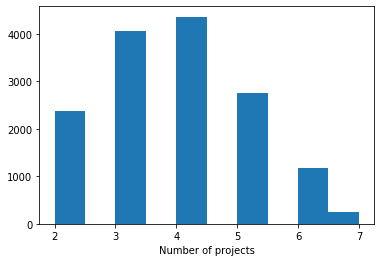

In [19]:
plt.hist(HR_dirty_data['number_project'].dropna())
plt.xlabel('Number of projects')
plt.show()

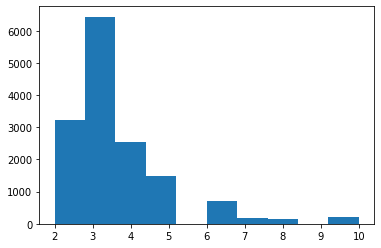

In [20]:
plt.hist(HR_dirty_data['time_spend_company'].dropna())
plt.show()

In [21]:
HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000    14993.000000   
mean             0.612826         0.716053        3.802841   
std              0.248637         0.171150        1.232324   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14997.000000  14997.000000   
mean             201.046146            3.498133       0.144696      0.237981   
std               49.941556            1.460305       0.352184      0.426175   
min               96.000000            2.000000      -1.000000     -1.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       2.000000      1.000000   

       promotion_last_5years  
count           14997.000000  
mean                0.021138  
std                 0.144772  
min                -1.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [22]:
mask = HR_dirty_data['Work_accident'] < 0
HR_dirty_data.loc[mask, 'Work_accident'] = np.nan

mask = HR_dirty_data['left'] < 0
HR_dirty_data.loc[mask, 'left'] = np.nan

mask = HR_dirty_data['promotion_last_5years'] < 0
HR_dirty_data.loc[mask, 'promotion_last_5years'] = np.nan

In [23]:
HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000    14993.000000   
mean             0.612826         0.716053        3.802841   
std              0.248637         0.171150        1.232324   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14996.000000  14995.000000   
mean             201.046146            3.498133       0.144772      0.238146   
std               49.941556            1.460305       0.352072      0.425963   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       2.000000      1.000000   

       promotion_last_5years  
count           14995.000000  
mean                0.021274  
std                 0.144300  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [24]:
mask = HR_dirty_data['Work_accident'] > 1
HR_dirty_data.loc[mask, 'Work_accident'] = np.nan

HR_dirty_data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14998.000000     14994.000000    14993.000000   
mean             0.612826         0.716053        3.802841   
std              0.248637         0.171150        1.232324   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14996.000000        14994.000000   14995.000000  14995.000000   
mean             201.046146            3.498133       0.144648      0.238146   
std               49.941556            1.460305       0.351758      0.425963   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14995.000000  
mean                0.021274  
std                 0.144300  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

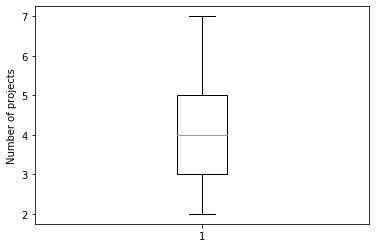

In [27]:
# Sprawdzmy teraz czy nie pominelismy jakis wartosci odstajacych przy pomocy box plot
# sprawdzamy tylko zmienne ciagle, tj. number_project, average_montly_hours, time_spend_company
plt.boxplot(HR_dirty_data['number_project'].dropna(), sym='k.')  # sym-'k.' dodany w celu zmiany ozaczenia dla wartosci
# odstajacych, jezeli modul seaborn jest zaimportowany to matplotlib nie pokazuje ich uzywajac domyslnego symbolu
plt.ylabel('Number of projects')
plt.show()

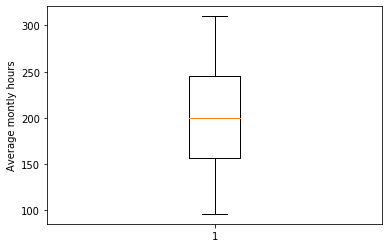

In [28]:
plt.boxplot(HR_dirty_data['average_montly_hours'].dropna(), sym='k.')
plt.ylabel('Average montly hours')
plt.show()

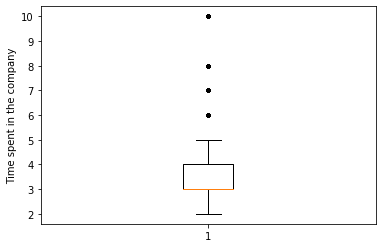

In [29]:
plt.boxplot(HR_dirty_data['time_spend_company'].dropna(), sym='k.')
plt.ylabel('Time spent in the company')
plt.show()

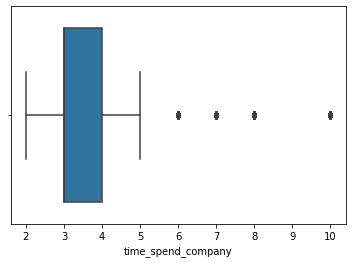

In [33]:
import seaborn as sns

#sns.boxplot(HR_dirty_data['number_project'])
#sns.boxplot(HR_dirty_data['average_montly_hours'])
sns.boxplot(HR_dirty_data['time_spend_company'])

In [36]:
HR_dirty_data['sales'].unique()

array(['sales', 'saless', 'accounting', 'hr', 'technical', 'support',
       'management', 'IT', 'product_mng', 'marketing', 'hrr', 'it',
       'RandD', 'Tech', 'tech', nan], dtype=object)

In [35]:
HR_dirty_data['sales'] = HR_dirty_data['sales'].str.replace(" ", "")

In [40]:
# Teraz sprawdzmy, ktore wartosci zostaly prawdopodobnie wprowadzone przez przypadek
# wystepuja tylko 1-2 razy
HR_dirty_data['sales'].value_counts()
# stworzmy mape, ktora zamieni nam te pojedyncze wartosci za ich poprawna wersje
# hrr -> hr, saless -> sales, Tech -> technical, tech -> technical, it -> IT

sales_map = {'hrr': 'hr', 'saless': 'sales',
             'Tech': 'technical', 'tech': 'technical', 'it': 'IT'}

HR_dirty_data["sales"].replace(sales_map, inplace=True)
HR_dirty_data['sales'].value_counts()

sales          4139
technical      2720
support        2228
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [38]:
HR_dirty_data['sales'].str

In [39]:
HR_dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14998 non-null float64
last_evaluation          14994 non-null float64
number_project           14993 non-null float64
average_montly_hours     14996 non-null float64
time_spend_company       14994 non-null float64
Work_accident            14995 non-null float64
left                     14995 non-null float64
promotion_last_5years    14995 non-null float64
sales                    14997 non-null object
salary                   14995 non-null object
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [45]:
# salary #
#HR_dirty_data['salary'].unique()
HR_dirty_data['salary'] = HR_dirty_data['salary'].str.replace(" ", "")
HR_dirty_data['salary'].value_counts()
salary_map = {'mediu': 'medium', 'Medium': 'medium'}
HR_dirty_data['salary'].replace(salary_map, inplace=True)
HR_dirty_data['salary'].value_counts()

low       7314
medium    6444
high      1237
Name: salary, dtype: int64

In [46]:
HR_dirty_data['salary'].unique()

array(['low', 'medium', nan, 'high'], dtype=object)

In [48]:
HR_dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14998 non-null float64
last_evaluation          14994 non-null float64
number_project           14993 non-null float64
average_montly_hours     14996 non-null float64
time_spend_company       14994 non-null float64
Work_accident            14995 non-null float64
left                     14995 non-null float64
promotion_last_5years    14995 non-null float64
sales                    14997 non-null object
salary                   14995 non-null object
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [50]:
HR_dirty_data_no_nan = HR_dirty_data.dropna()
HR_dirty_data_no_nan.info()
HR_dirty_data_no_nan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14962 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14962 non-null float64
last_evaluation          14962 non-null float64
number_project           14962 non-null float64
average_montly_hours     14962 non-null float64
time_spend_company       14962 non-null float64
Work_accident            14962 non-null float64
left                     14962 non-null float64
promotion_last_5years    14962 non-null float64
sales                    14962 non-null object
salary                   14962 non-null object
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [51]:
HR_dirty_data_no_nan

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53             2.0   
1                    0.80             0.86             5.0   
2                    0.11             0.88             7.0   
3                    0.72             0.87             5.0   
4                    0.37             0.52             2.0   
5                    0.41             0.50             2.0   
6                    0.10             0.77             6.0   
7                    0.92             0.85             5.0   
8                    0.89             1.00             5.0   
11                   0.11             0.81             6.0   
12                   0.84             0.92             4.0   
13                   0.41             0.55             2.0   
14                   0.36             0.56             2.0   
15                   0.38             0.54             2.0   
18                   0.45             0.51             2.0   
19                   0.76             0.89             5.0   
20                   0.11             0.83             6.0   
21                   0.38             0.55             2.0   
22                   0.09             0.95             6.0   
24                   0.40             0.53             2.0   
26                   0.82             0.87             4.0   
27                   0.40             0.49             2.0   
29                   0.38             0.50             2.0   
30                   0.09             0.62             6.0   
32                   0.40             0.51             2.0   
33                   0.45             0.55             2.0   
34                   0.84             0.87             4.0   
36                   0.38             0.46             2.0   
37                   0.45             0.50             2.0   
39                   0.41             0.54             2.0   
...                   ...              ...             ...   
14969                0.43             0.46             2.0   
14970                0.78             0.93             4.0   
14971                0.39             0.45             2.0   
14972                0.11             0.97             6.0   
14973                0.36             0.52             2.0   
14974                0.36             0.54             2.0   
14975                0.10             0.79             7.0   
14976                0.40             0.47             2.0   
14977                0.81             0.85             4.0   
14978                0.40             0.47             2.0   
14979                0.09             0.93             6.0   
14980                0.76             0.89             5.0   
14981                0.73             0.93             5.0   
14982                0.38             0.49             2.0   
14983                0.72             0.84             5.0   
14984                0.40             0.56             2.0   
14985                0.91             0.99             5.0   
14986                0.85             0.85             4.0   
14987                0.90             0.70             5.0   
14988                0.46             0.55             2.0   
14989                0.43             0.57             2.0   
14990                0.89             0.88             5.0   
14991                0.09             0.81             6.0   
14992                0.40             0.48             2.0   
14993                0.76             0.83             6.0   
14994                0.40             0.57             2.0   
14995                0.37             0.48             2.0   
14996                0.37             0.53             2.0   
14997                0.11             0.96             6.0   
14998                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                     157.0                 3.0            0.0   1.0   
1                 

In [52]:
HR_dirty_data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53             2.0   
1                    0.80             0.86             5.0   
2                    0.11             0.88             7.0   
3                    0.72             0.87             5.0   
4                    0.37             0.52             2.0   
5                    0.41             0.50             2.0   
6                    0.10             0.77             6.0   
7                    0.92             0.85             5.0   
8                    0.89             1.00             5.0   
9                    0.42             0.53             2.0   
10                   0.45              NaN             2.0   
11                   0.11             0.81             6.0   
12                   0.84             0.92             4.0   
13                   0.41             0.55             2.0   
14                   0.36             0.56             2.0   
15                   0.38             0.54             2.0   
16                   0.45             0.47             2.0   
17                   0.78              NaN             4.0   
18                   0.45             0.51             2.0   
19                   0.76             0.89             5.0   
20                   0.11             0.83             6.0   
21                   0.38             0.55             2.0   
22                   0.09             0.95             6.0   
23                   0.46             0.57             NaN   
24                   0.40             0.53             2.0   
25                   0.89              NaN             5.0   
26                   0.82             0.87             4.0   
27                   0.40             0.49             2.0   
28                   0.41             0.46             2.0   
29                   0.38             0.50             2.0   
...                   ...              ...             ...   
14969                0.43             0.46             2.0   
14970                0.78             0.93             4.0   
14971                0.39             0.45             2.0   
14972                0.11             0.97             6.0   
14973                0.36             0.52             2.0   
14974                0.36             0.54             2.0   
14975                0.10             0.79             7.0   
14976                0.40             0.47             2.0   
14977                0.81             0.85             4.0   
14978                0.40             0.47             2.0   
14979                0.09             0.93             6.0   
14980                0.76             0.89             5.0   
14981                0.73             0.93             5.0   
14982                0.38             0.49             2.0   
14983                0.72             0.84             5.0   
14984                0.40             0.56             2.0   
14985                0.91             0.99             5.0   
14986                0.85             0.85             4.0   
14987                0.90             0.70             5.0   
14988                0.46             0.55             2.0   
14989                0.43             0.57             2.0   
14990                0.89             0.88             5.0   
14991                0.09             0.81             6.0   
14992                0.40             0.48             2.0   
14993                0.76             0.83             6.0   
14994                0.40             0.57             2.0   
14995                0.37             0.48             2.0   
14996                0.37             0.53             2.0   
14997                0.11             0.96             6.0   
14998                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                     157.0                 3.0            0.0   1.0   
1                 

In [60]:
HR_dirty_data_no_nan.reset_index(drop=True)

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53             2.0   
1                    0.80             0.86             5.0   
2                    0.11             0.88             7.0   
3                    0.72             0.87             5.0   
4                    0.37             0.52             2.0   
5                    0.41             0.50             2.0   
6                    0.10             0.77             6.0   
7                    0.92             0.85             5.0   
8                    0.89             1.00             5.0   
9                    0.11             0.81             6.0   
10                   0.84             0.92             4.0   
11                   0.41             0.55             2.0   
12                   0.36             0.56             2.0   
13                   0.38             0.54             2.0   
14                   0.45             0.51             2.0   
15                   0.76             0.89             5.0   
16                   0.11             0.83             6.0   
17                   0.38             0.55             2.0   
18                   0.09             0.95             6.0   
19                   0.40             0.53             2.0   
20                   0.82             0.87             4.0   
21                   0.40             0.49             2.0   
22                   0.38             0.50             2.0   
23                   0.09             0.62             6.0   
24                   0.40             0.51             2.0   
25                   0.45             0.55             2.0   
26                   0.84             0.87             4.0   
27                   0.38             0.46             2.0   
28                   0.45             0.50             2.0   
29                   0.41             0.54             2.0   
...                   ...              ...             ...   
14932                0.43             0.46             2.0   
14933                0.78             0.93             4.0   
14934                0.39             0.45             2.0   
14935                0.11             0.97             6.0   
14936                0.36             0.52             2.0   
14937                0.36             0.54             2.0   
14938                0.10             0.79             7.0   
14939                0.40             0.47             2.0   
14940                0.81             0.85             4.0   
14941                0.40             0.47             2.0   
14942                0.09             0.93             6.0   
14943                0.76             0.89             5.0   
14944                0.73             0.93             5.0   
14945                0.38             0.49             2.0   
14946                0.72             0.84             5.0   
14947                0.40             0.56             2.0   
14948                0.91             0.99             5.0   
14949                0.85             0.85             4.0   
14950                0.90             0.70             5.0   
14951                0.46             0.55             2.0   
14952                0.43             0.57             2.0   
14953                0.89             0.88             5.0   
14954                0.09             0.81             6.0   
14955                0.40             0.48             2.0   
14956                0.76             0.83             6.0   
14957                0.40             0.57             2.0   
14958                0.37             0.48             2.0   
14959                0.37             0.53             2.0   
14960                0.11             0.96             6.0   
14961                0.37             0.52             2.0   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                     157.0                 3.0            0.0   1.0   
1                 

In [55]:
?pd.DataFrame.reset_index

In [57]:
help(pd.DataFrame.reset_index)

Help on function reset_index in module pandas.core.frame:

reset_index(self, level=None, drop=False, inplace=False, col_level=0, col_fill='')
    Reset the index, or a level of it.
    
    Reset the index of the DataFrame, and use the default one instead.
    If the DataFrame has a MultiIndex, this method can remove one or more
    levels.
    
    Parameters
    ----------
    level : int, str, tuple, or list, default None
        Only remove the given levels from the index. Removes all levels by
        default.
    drop : bool, default False
        Do not try to insert index into dataframe columns. This resets
        the index to the default integer index.
    inplace : bool, default False
        Modify the DataFrame in place (do not create a new object).
    col_level : int or str, default 0
        If the columns have multiple levels, determines which level the
        labels are inserted into. By default it is inserted into the first
        level.
    col_fill : object, defa